## 如何修改字段类型？
在导入数据时，你可以通过 `dtype` 参数指定 `订单周期` 字段为字符串类型：

### 1. 在导入数据时指定类型
```python
data = pd.read_excel('part-2.xlsx', dtype={'订单周期': str})
```

### 2. 导入数据之后修改类型
如果数据已经导入，你可以使用 `astype` 方法将 `订单周期` 字段转换为字符串：

```python
data['订单周期'] = data['订单周期'].astype(str)
```

In [2]:
import pandas as pd

# 假设你的数据存储在一个 DataFrame 中
data = {
    '商机编码': ['A001', 'A002'],
    '合同总金额（元）': [100000, 200000],
    '人员名称': ['张三,李四', '张三,赵六,孙七']
}

df = pd.DataFrame(data)

# 拆分人员名称列
df['人员名称'] = df['人员名称'].str.split(',')

# 使用 explode 将拆分的列表展开为多行
df_expanded = df.explode('人员名称')

# 输出结果
print(df_expanded)

   商机编码  合同总金额（元） 人员名称
0  A001    100000   张三
0  A001    100000   李四
1  A002    200000   张三
1  A002    200000   赵六
1  A002    200000   孙七


In [6]:
import pandas as pd

# 假设你的数据存储在一个 DataFrame 中
data = {
    '商机编码': ['A001', 'A001', 'A002', 'A002', 'A001','A003'],
    '合同总金额（元）': [100000, 100000, 200000, 200000, 100000, 100000],
    '人员名称': ['张三', '张三', '李四', '李四', '张三','王五']
}

df = pd.DataFrame(data)

df


,商机编码,合同总金额（元）,人员名称
0,A001,100000,张三
1,A001,100000,张三
2,A002,200000,李四
3,A002,200000,李四
4,A001,100000,张三
5,A003,100000,王五


In [7]:
# 先对数据进行分组并过滤出重复的组合
duplicates = df.groupby(['商机编码', '人员名称'])['合同总金额（元）'].filter(lambda x: len(x) > 1)
duplicates

0    100000
1    100000
2    200000
3    200000
4    100000
Name: 合同总金额（元）, dtype: int64

In [12]:
import pandas as pd

# 创建三个Series对象
series1 = pd.Series([5, 1, 1], index=['AA', 'BB', 'CC'], name='字段1')
series2 = pd.Series([5, 1, 1], index=['AA', 'BB', 'CC'], name='字段2')
series3 = pd.Series([5, 1], index=['BB', 'EE'], name='字段3')

# 使用pd.concat合并Series为DataFrame
df = pd.concat([series1, series2, series3], axis=1)

print(df)

    字段1  字段2  字段3
AA  5.0  5.0  NaN
BB  1.0  1.0  5.0
CC  1.0  1.0  NaN
EE  NaN  NaN  1.0


## 如何格式化输出数字?
在 Pandas 中，可以通过 `pd.options.display.float_format` 设置浮点数显示格式，或者直接在 `describe()` 结果上进行格式化，来避免科学计数法显示过大的数值。你可以尝试以下方法：

1. **全局设置浮点数格式**：使用 `pd.options.display.float_format` 设置显示格式，使浮点数以普通数字形式展示。例如，将数值格式化为带有千位分隔符的格式。

   ```python
   import pandas as pd

   # 设置全局浮点数格式
   pd.options.display.float_format = '{:,.2f}'.format

   # 然后调用 describe()
   data['资源收入总和(税前)'].describe()
   ```

2. **针对 `describe()` 输出进行格式化**：若不想更改全局设置，可以在 `describe()` 的结果上直接应用 `applymap()` 或 `map()` 格式化每个数值。

   ```python
   # 获取 describe() 结果
   desc = data['资源收入总和(税前)'].describe()

   # 将结果转换为 DataFrame 并格式化每个数值
   formatted_desc = desc.apply(lambda x: f"{x:,.2f}")
   print(formatted_desc)
   ```

3. **显示为特定单位**：如果希望按“万”或“亿”单位展示，可以先对数据进行单位转换，再显示：

   ```python
   # 将数据转换为“万”单位
   data['资源收入总和(税前)_万'] = data['资源收入总和(税前)'] / 10000
   desc_in_ten_thousands = data['资源收入总和(税前)_万'].describe()

   # 格式化显示
   formatted_desc = desc_in_ten_thousands.apply(lambda x: f"{x:,.2f} 万")
   print(formatted_desc)
   ```

这样可以将 `describe()` 的输出调整为更易读的格式，避免科学计数法显示。

## 如何查询某列为空或者 na 的数量?
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5], 'C': [1, 2, 3, 4, 5], 'D': [1, 2, 3, 4, 5]})
df.isnull().sum()

## 如何对数据进行过滤
在 Pandas 中，除了使用 `data[data['资源收入总和(税后)'] > 1.0]` 这种布尔索引方式来过滤数据，还有其他多种方法可以达到相同的效果：

### 1. **`query()` 方法**
   - 使用 `query()` 方法可以使过滤条件的语法更加简洁，尤其是在多重条件下。
   - 语法类似 SQL，适合列名不包含空格或特殊字符的情况（否则需要使用反引号 `\`` 包裹）。

   ```python
   # 使用 query() 方法过滤数据
   filtered_data = data.query('资源收入总和(税后) > 1.0')
   ```

### 2. **`loc` 方法**
   - `loc` 方法用于基于标签选择数据，支持与布尔索引类似的筛选语法。
   
   ```python
   # 使用 loc 方法进行过滤
   filtered_data = data.loc[data['资源收入总和(税后)'] > 1.0]
   ```

### 3. **`apply()` 和自定义函数**
   - `apply()` 可以接受一个自定义函数用于过滤数据。
   - 适合复杂条件筛选，比如需要同时依赖多个列或有特殊条件时。

   ```python
   # 定义过滤条件
   filtered_data = data[data['资源收入总和(税后)'].apply(lambda x: x > 1.0)]
   ```

### 4. **`mask()` 和 `where()` 方法**
   - `mask()` 和 `where()` 适用于根据条件筛选数据，`mask()` 会将不符合条件的值替换为 NaN，而 `where()` 会将符合条件的值保留，不符合的值替换为 NaN。
   - 然后可以使用 `.dropna()` 删除 NaN 行，以达到过滤效果。

   ```python
   # 使用 where() 过滤数据
   filtered_data = data.where(data['资源收入总和(税后)'] > 1.0).dropna()

   # 使用 mask() 过滤数据
   filtered_data = data.mask(data['资源收入总和(税后)'] <= 1.0).dropna()
   ```

### 5. **`isin()` 方法**
   - `isin()` 主要用于匹配特定值的列表，比如筛选某列是否在某一值列表中，适合于分类数据的过滤。
   
   ```python
   # 假设我们要筛选税后收入为特定几个值的行
   filtered_data = data[data['资源收入总和(税后)'].isin([1.0, 2.0, 3.0])]
   ```

### 6. **多条件过滤**
   - 可以通过组合多种条件来进行更复杂的筛选。使用 `&`（and）和 `|`（or）操作符进行条件组合时，需要将每个条件用括号括起来。
   
   ```python
   # 组合条件过滤
   filtered_data = data[(data['资源收入总和(税后)'] > 1.0) & (data['资源收入总和(税前)'] < 500)]
   ```

### 7. **`filter()` 方法（用于列筛选）**
   - `filter()` 本质上是用来按列名、行名筛选的，不是用于按条件筛选，但可用于特定列的组合过滤。
   
   ```python
   # 筛选指定列，然后再使用条件过滤
   filtered_data = data.filter(items=['资源收入总和(税后)', '其他列名'])
   filtered_data = filtered_data[filtered_data['资源收入总和(税后)'] > 1.0]
   ```

这些方法为数据筛选提供了灵活的选择，可以根据需要选择最合适的方式来过滤数据。

## 如何排除某些列中的极端值？

### 方法 1：通过条件筛选排除极端值
首先，使用 Pandas 的条件筛选来排除明显的异常值，然后再进行可视化。例如，可以排除掉值为 0 或者极大值（通过设定一个阈值）：

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = pd.DataFrame({
    '销售收入': [10, 20, 30, 0, 1000000, 25, 15, 35, 50, 5, 40, 0, 300]
})

# 设定条件筛选，排除为 0 或者超过设定阈值（如 10000）的极端值
filtered_data = data[(data['销售收入'] > 0) & (data['销售收入'] < 10000)]

# 绘制直方图
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['销售收入'], bins=20)
plt.xlabel("销售收入")
plt.ylabel("频率")
plt.title("排除极端值后的销售收入分布")
plt.show()
```

### 方法 2：使用统计方法自动过滤极端值
如果不清楚具体的阈值，可以使用统计学方法，比如基于 **IQR**（四分位距）或 **Z-score** 来自动识别和排除极端值。

#### 使用 IQR（四分位距）过滤
四分位距（IQR）是一种用于识别异常值的统计方法，可以排除超出 1.5 倍 IQR 范围的极端值。

```python
# 计算 IQR
Q1 = data['销售收入'].quantile(0.25)
Q3 = data['销售收入'].quantile(0.75)
IQR = Q3 - Q1

# 筛选条件：保留在 Q1 - 1.5 * IQR 和 Q3 + 1.5 * IQR 范围内的数据
filtered_data = data[(data['销售收入'] >= Q1 - 1.5 * IQR) & (data['销售收入'] <= Q3 + 1.5 * IQR)]

# 绘制直方图
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['销售收入'], bins=20)
plt.xlabel("销售收入")
plt.ylabel("频率")
plt.title("排除 IQR 异常值后的销售收入分布")
plt.show()
```

#### 使用 Z-score 过滤
Z-score 可以帮助识别离平均值过远的异常值。通常设定 Z-score 阈值为 3 即可有效识别异常值。

```python
from scipy import stats

# 计算 Z-score 并筛选出 Z-score 在 -3 到 3 之间的数据
filtered_data = data[(stats.zscore(data['销售收入']) < 3) & (stats.zscore(data['销售收入']) > -3)]

# 绘制直方图
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['销售收入'], bins=20)
plt.xlabel("销售收入")
plt.ylabel("频率")
plt.title("排除 Z-score 异常值后的销售收入分布")
plt.show()
```

### 总结
- **条件筛选**：适合已知极端值范围的情况。
- **IQR 方法**：适合数据无明显边界的情况，自动排除离散数据点。
- **Z-score 方法**：适合数据呈正态分布的情况，识别远离均值的异常点。

使用这些方法过滤数据后，绘图效果会更具代表性，极端值不会影响分布的可视化效果。

In [5]:
import pandas as pd

# 创建示例数据
data = {
    '客户id': [3, 3, 3, 4, 4],
    '销售日期月份': pd.period_range(start='2023-05', periods=5, freq='M'),
    '订单数量': [2, 1, 2, 1, 1],
    '正常资源数量': [6, 2, 6, 2, 2],
    '来源渠道': ['省公司', '云省分', '省公司', '云省分', '云省分'],
    '用户邮箱': ['aa@qq.com', 'bb@qq.com', 'cc@qq.com', 'dd@qq.com', 'ee@bcp.ctyun.cn'],
    'cpu核数汇总_当月': [8.0, 7.0, 6.0, 4.0, 2.0],
    '内存容量汇总_当月': [16.0, 16.0, 16.0, 8.0, 4.0],
}
df = pd.DataFrame(data)

# 将 "销售日期月份" 字段设置为 period[M] 类型
df['销售日期月份'] = df['销售日期月份'].astype('period[M]')

# 按客户ID和月份排序
df = df.sort_values(by=['客户id', '销售日期月份'])

# 获取上月的字段数据
df['cpu核数汇总_上月'] = df.groupby('客户id')['cpu核数汇总_当月'].shift(1)
df['内存容量汇总_上月'] = df.groupby('客户id')['内存容量汇总_当月'].shift(1)

# 计算增量百分比
for col in ['cpu核数汇总', '内存容量汇总']:
    df[f'{col}_增量'] = ((df[f'{col}_当月'] - df[f'{col}_上月']) / df[f'{col}_上月']) * 100

# 展示结果
df.head()


,客户id,销售日期月份,订单数量,正常资源数量,来源渠道,用户邮箱,cpu核数汇总_当月,内存容量汇总_当月,cpu核数汇总_上月,内存容量汇总_上月,cpu核数汇总_增量,内存容量汇总_增量
0,3,2023-05,2,6,省公司,aa@qq.com,8.0,16.0,NaN,NaN,NaN,NaN
1,3,2023-06,1,2,云省分,bb@qq.com,7.0,16.0,8.0,16.0,-12.500000,0.0
2,3,2023-07,2,6,省公司,cc@qq.com,6.0,16.0,7.0,16.0,-14.285714,0.0
3,4,2023-08,1,2,云省分,dd@qq.com,4.0,8.0,NaN,NaN,NaN,NaN
4,4,2023-09,1,2,云省分,ee@bcp.ctyun.cn,2.0,4.0,4.0,8.0,-50.000000,-50.0


In [6]:
import pandas as pd

# 创建示例数据
data = {
    '客户id': [1, 1, 1, 2, 2],
    '销售日期月份': pd.period_range(start='2023-01', periods=5, freq='M'),
    'cpu核数汇总_当月': [4, 5, 6, 7, 8]
}
df = pd.DataFrame(data)

# 按 '客户id' 分组后对 'cpu核数汇总_当月' 列进行 shift 操作
df['cpu核数汇总_上月'] = df.groupby('客户id')['cpu核数汇总_当月'].shift(1)

print(df)


   客户id   销售日期月份  cpu核数汇总_当月  cpu核数汇总_上月
0     1  2023-01           4         NaN
1     1  2023-02           5         4.0
2     1  2023-03           6         5.0
3     2  2023-04           7         NaN
4     2  2023-05           8         7.0


在 Pandas 中，`merge` 和 `join` 都是用来合并数据的函数，但它们的用法和适用场景略有不同。以下是它们的使用方法和区别的详细说明以及示例。

---

### **1. `merge`**
`merge` 是一种基于键（key）或列来合并 DataFrame 的方法，类似于 SQL 的 JOIN 操作。你可以指定如何合并，例如 inner, outer, left, right。

#### **语法**
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None)
```

#### **关键参数**
- `left` 和 `right`：要合并的两个 DataFrame。
- `how`：指定合并方式，有以下选项：
  - `'inner'`（默认）：交集。
  - `'outer'`：并集。
  - `'left'`：左表优先。
  - `'right'`：右表优先。
- `on`：指定用于合并的列名，必须两表都有该列。
- `left_on` 和 `right_on`：分别指定左表和右表用于合并的列名。

#### **示例**
```python
import pandas as pd

df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'id': [2, 3, 4],
    'score': [85, 90, 78]
})

# Inner join
result = pd.merge(df1, df2, on='id', how='inner')
print(result)
# 输出：
#    id   name  score
# 0   2    Bob     85
# 1   3 Charlie     90
```

---

### **2. `join`**
`join` 是另一种合并方法，通常用于基于索引合并。如果两个 DataFrame 的索引匹配，`join` 是非常便捷的选择。

#### **语法**
```python
df1.join(df2, how='left', on=None)
```

#### **关键参数**
- `df2`：要合并的 DataFrame。
- `how`：合并方式，选项同 `merge`。
- `on`：指定用于连接的列（如果不指定，默认使用索引）。

#### **示例**
```python
df1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'score': [85, 90, 78]
}, index=[1, 2, 3])

df2 = pd.DataFrame({
    'subject': ['Math', 'English', 'History']
}, index=[1, 2, 4])

# Left join
result = df1.join(df2, how='left')
print(result)
# 输出：
#        name  score  subject
# 1     Alice     85     Math
# 2       Bob     90  English
# 3   Charlie     78      NaN
```

---

### **3. 区别总结**

| 特性          | `merge`                                   | `join`                              |
|---------------|-------------------------------------------|-------------------------------------|
| 合并依据      | 基于列，类似 SQL JOIN                     | 基于索引或通过 `on` 指定的列         |
| 默认合并方式  | `how='inner'`                             | `how='left'`                       |
| 操作的灵活性  | 可以基于多个键合并，灵活性更高            | 简单直接，适合基于索引的合并          |
| 适用场景      | 合并两表时需要明确指定连接键              | 如果两表具有相同索引，或需要简单合并 |

---

### **4. 同时使用索引和列**
如果既想用索引又想用列来合并，可以结合 `merge` 使用 `left_index` 和 `right_index` 参数。

#### **示例**
```python
result = pd.merge(df1, df2, how='outer', left_index=True, right_index=True)
print(result)
# 同时合并索引时，支持灵活选项。
```

如果还有更复杂的场景需求，我可以提供更多示例！

/var/folders/k5/n2q73fm52klgx4b68wyr24t40000gp/T/ipykernel_41497/3855242849.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  '日期': pd.date_range(start='2024-01-01', periods=12, freq='M'),
/opt/homebrew/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/py311/lib/python3.11/site-packages/

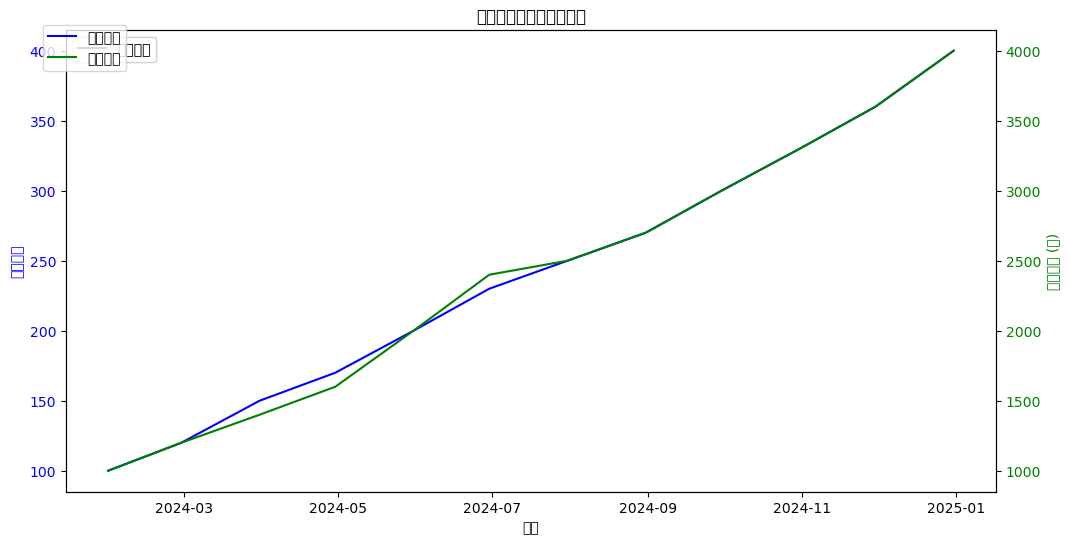

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = pd.DataFrame({
    '日期': pd.date_range(start='2024-01-01', periods=12, freq='M'),
    '订单数量': [100, 120, 150, 170, 200, 230, 250, 270, 300, 330, 360, 400],
    '订单收入': [1000, 1200, 1400, 1600, 2000, 2400, 2500, 2700, 3000, 3300, 3600, 4000]
})

# 设置画布
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：订单数量
sns.lineplot(
    x='日期', 
    y='订单数量', 
    data=data, 
    ax=ax1, 
    color='blue', 
    label='订单数量'
)
ax1.set_ylabel('订单数量', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 右轴：订单收入
ax2 = ax1.twinx()  # 创建共享 X 轴的第二个 Y 轴
sns.lineplot(
    x='日期', 
    y='订单收入', 
    data=data, 
    ax=ax2, 
    color='green', 
    label='订单收入'
)
ax2.set_ylabel('订单收入 (元)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 图例和标题
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title('订单数量与订单收入趋势')
plt.show()

在 Jupyter Notebook (ipynb 文件) 中，`%` 和 `!` 是两种用于执行命令的符号，它们有不同的用途和行为：

---

### 1. **`%`：魔法命令 (Magic Command)**

- **作用**: `%%` 或 `%` 用于执行 Jupyter 提供的特殊 "魔法命令"。
- **特点**:
  - 魔法命令是 Jupyter 内置的功能，与 Python 代码交互紧密结合。
  - 以单个 `%` 开头的魔法命令作用于一行代码。
  - 以双 `%` 开头的魔法命令作用于整个单元格。
  - 魔法命令不需要外部 shell 环境。

- **常用例子**:
  ```python
  %timeit x = [i**2 for i in range(1000)]  # 测试代码运行时间
  %matplotlib inline  # 在 Notebook 中内嵌 Matplotlib 图
  %%writefile example.py
  print("This is a Python script.")  # 将内容写入文件
  ```

- **使用场景**:
  - 优化性能、加载扩展、进行环境配置等。

---

### 2. **`!`：Shell 命令**

- **作用**: `!` 用于直接运行系统 shell 命令，例如 bash 或 cmd（视操作系统而定）。
- **特点**:
  - `!` 后面跟随的是普通的 shell 命令。
  - 通过子进程运行，与当前 Python 进程相互独立。
  - 可以捕获输出结果，返回为 Python 列表或字符串。

- **常用例子**:
  ```python
  !ls -l  # 列出当前目录下的文件 (Linux/Mac)
  !dir  # 列出当前目录下的文件 (Windows)
  !pip install numpy  # 安装 Python 包
  ```

- **使用场景**:
  - 运行系统命令、管理文件系统、安装依赖等。

---

### **区别对比**

| 特性                  | `%` 魔法命令                    | `!` Shell 命令                 |
|-----------------------|--------------------------------|--------------------------------|
| **用法**              | 特定于 Jupyter 的命令          | 系统 Shell 命令               |
| **功能范围**          | 与 Python 环境集成，优化性能等 | 与 Python 无直接关系          |
| **执行环境**          | Jupyter 内置支持               | 由操作系统的 Shell 执行       |
| **输入格式**          | 自定义魔法命令语法             | 标准 Shell 语法               |

---

### **综合使用示例**

```python
# 使用 %timeit 测试 Python 代码性能
%timeit x = [i**2 for i in range(1000)]

# 使用 !pip 安装包
!pip install pandas

# 写入一个文件
%%writefile hello.py
print("Hello, Jupyter!")

# 列出当前目录内容
!ls
```

总结来说，`%` 是 Jupyter 的内置魔法命令，主要用于增强 Notebook 的功能；`!` 用于运行操作系统的 Shell 命令，两者可以结合使用来高效完成任务。